### Imports

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas 

Using TensorFlow backend.


### Data Preparation

In [145]:
data = pandas.read_csv('./data/Learning/Training_set_new.csv')
test = pandas.read_csv('./data/Learning/Test_set.csv')
gtTrain = pandas.read_csv('./data/21/groundTruthEdited.csv')
gtTest = pandas.read_csv('./data/17/groundTruthEdited.csv')

x_train_set = data[['x','y','z']]

target = data['brakingStatus']
# xtrain_set = [data[['x','y','z']][i:i+1].iterrows() for i in range(0,train_set)]
# target = [data['brakingStatus'][i:i+1] for i in range(0,train_set)]

x_test_set = test[['x','y','z']]
y_test_set = test['brakingStatus']


In [146]:
x_train_set = np.array(x_train_set,dtype=float)

target = np.array(target,dtype=float)

x_test_set =  np.array(x_test_set,dtype=float)
y_test_set =  np.array(y_test_set,dtype=float)

In [147]:
x_train_set_array= []      
for i in x_train_set:
    x_train_set_array.append([i])
x_train_set_array = np.array(x_train_set_array, dtype = float)

x_test_set_array= []      
for i in x_test_set:
    x_test_set_array.append([i])
x_test_set_array = np.array(x_test_set_array, dtype = float)

y_test_set_array= []      
for i in y_test_set:
    y_test_set_array.append([i])
y_test_set_array = np.array(y_test_set_array, dtype = float)

target_array= []      
for i in target:
    target_array.append([i])
target_array = np.array(target_array, dtype = float)




In [148]:
# target_array.shape
x_train_set_array.shape

(41178, 1, 3)

In [149]:
x_test_set_array.shape

(20675, 1, 3)

In [150]:
gtTrain

,evento,startIndexinAcc,endIndexinAcc
0,evento_nao_agressivo,1751,1954
1,troca_faixa_esquerda_agressiva,1140,1241
2,evento_nao_agressivo,4298,4552
3,troca_faixa_esquerda_agressiva,4909,5112
4,troca_faixa_esquerda_agressiva,5470,5622
5,evento_nao_agressivo,5928,6182
6,troca_faixa_esquerda_agressiva,8271,8423
7,evento_nao_agressivo,9595,9849
8,freada_agressiva,10105,10256
9,freada_agressiva,13059,13261


### RNN model

In [151]:
model = Sequential()

In [152]:
model.add(LSTM(1,batch_input_shape= (None,1,3),return_sequences= False))

In [153]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [154]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [155]:
history = model.fit(x_train_set_array[12001:],target_array[12001:],epochs=100,validation_data=(x_test_set_array[0:12000],y_test_set_array[0:12000]))

Train on 29177 samples, validate on 12000 samples
Epoch 1/100
29177/29177 [==============================] - 5s 159us/step - loss: 0.3314 - acc: 0.9658 - val_loss: 0.5064 - val_acc: 0.9375
Epoch 2/100
29177/29177 [==============================] - 2s 82us/step - loss: 0.3095 - acc: 0.9687 - val_loss: 0.5148 - val_acc: 0.9375
Epoch 3/100
29177/29177 [==============================] - 2s 82us/step - loss: 0.2794 - acc: 0.9686 - val_loss: 0.5165 - val_acc: 0.9375
Epoch 4/100
29177/29177 [==============================] - 2s 82us/step - loss: 0.2593 - acc: 0.9686 - val_loss: 0.5168 - val_acc: 0.9375
Epoch 5/100
29177/29177 [==============================] - 2s 84us/step - loss: 0.2480 - acc: 0.9684 - val_loss: 0.5162 - val_acc: 0.9375
Epoch 6/100
29177/29177 [==============================] - 3s 86us/step - loss: 0.2434 - acc: 0.9681 - val_loss: 0.5234 - val_acc: 0.9375
Epoch 7/100
29177/29177 [==============================] - 3s 93us/step - loss: 0.2413 - acc: 0.9677 - val_loss: 0.5244 -

29177/29177 [==============================] - 2s 80us/step - loss: 0.1370 - acc: 0.9687 - val_loss: 0.2440 - val_acc: 0.9375
Epoch 60/100
29177/29177 [==============================] - 2s 79us/step - loss: 0.1370 - acc: 0.9687 - val_loss: 0.2467 - val_acc: 0.9375
Epoch 61/100
29177/29177 [==============================] - 2s 79us/step - loss: 0.1370 - acc: 0.9687 - val_loss: 0.2455 - val_acc: 0.9375
Epoch 62/100
29177/29177 [==============================] - 2s 79us/step - loss: 0.1371 - acc: 0.9687 - val_loss: 0.2450 - val_acc: 0.9375
Epoch 63/100
29177/29177 [==============================] - 2s 83us/step - loss: 0.1370 - acc: 0.9687 - val_loss: 0.2451 - val_acc: 0.9375
Epoch 64/100
29177/29177 [==============================] - 2s 85us/step - loss: 0.1370 - acc: 0.9687 - val_loss: 0.2453 - val_acc: 0.9375
Epoch 65/100
29177/29177 [==============================] - 2s 80us/step - loss: 0.1370 - acc: 0.9687 - val_loss: 0.2460 - val_acc: 0.9375
Epoch 66/100
29177/29177 [==============

In [156]:
results = model.predict(x_test_set_array)

In [157]:
# results[11198:11349]
len(results)

20675

<function matplotlib.pyplot.show(*args, **kw)>

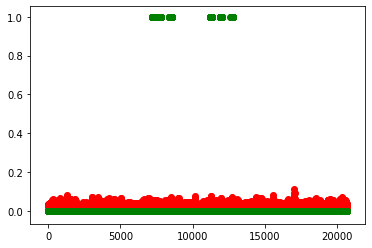

In [158]:
plt.scatter(range(20675),results,c='r')
plt.scatter(range(20675),y_test_set_array,c='g')
plt.show

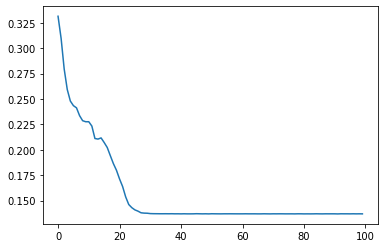

In [159]:
plt.plot(history.history['loss'])
plt.show()

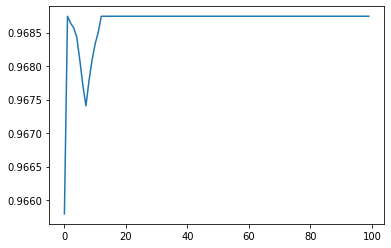

In [160]:
plt.plot(history.history['acc'])
plt.show()

### Training by just 'X' 

In [44]:
x_train_set_X = data['x']
x_test_set_X = test['x']


x_train_set_X = np.array(x_train_set_X,dtype= float)
x_test_set_X = np.array(x_test_set_X,dtype= float)


In [45]:
x_train_set_array_X= []      
for i in x_train_set:
    x_train_set_array_X.append([i])
x_train_set_array_X = np.array(x_train_set_array_X, dtype = float)

x_test_set_array_X= []      
for i in x_test_set:
    x_test_set_array_X.append([i])
x_test_set_array_X = np.array(x_test_set_array_X, dtype = float)

In [46]:
model_X = Sequential()

In [47]:
model_X.add(LSTM(1,batch_input_shape= (None,1,3),return_sequences= False))

In [49]:
model_X.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [50]:
model_X.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
